## Enterprise Analytics Final Project
**Thara Dawoodjee** 260611737   
**Tamar Bulka** 260679959     
**Kyle Gomes** 260664617   
**Francis McGuire** 260915465  

The Vinho Verde region in Portugal is home to thousands of wine makers. The goal of this project is to create an accurate regression model that
can predict the quality of red Vinho Verde wine. Furthermore, to investigate the various physiochemical properties that produce a high quality red wine. The results of this project can help wine makers in the Vinho Verde region decide if they should produce new red wine variants or not (depending on the levels of the physiochemical levels in the red wine and the predicted wine quality). 

## Set-up

In [22]:
import pandas as pd
import numpy as np
import seaborn as sn

# For figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [23]:
wine = pd.read_csv("RedWines.csv")

In [24]:
wine = wine.drop("Unnamed: 0", axis = 1)

## Discover and Visualize the Data to Gain Insights

In [25]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Most red wines have a quality of 5 or 6, with very few wines having a quality greater than 7 or less than 4. 

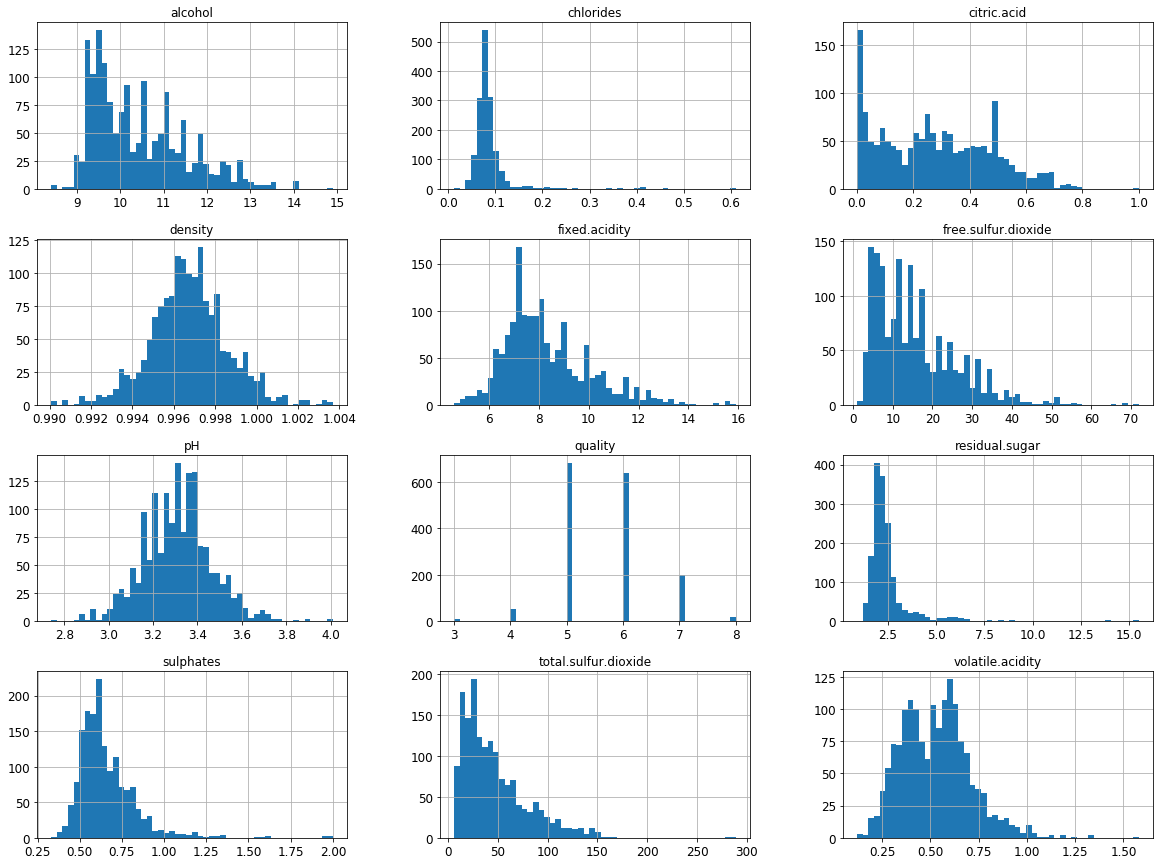

In [29]:
wine.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

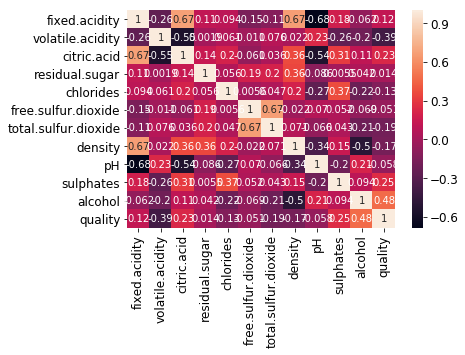

In [30]:
corrMatrix = wine.corr()
sn.heatmap(corrMatrix, annot=True)

In [34]:
corrMatrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric.acid             0.226373
fixed.acidity           0.124052
residual.sugar          0.013732
free.sulfur.dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total.sulfur.dioxide   -0.185100
volatile.acidity       -0.390558
Name: quality, dtype: float64

From the correlation matrix, alcohol (0.476), volatile acidity (-0.391), sulphates (0.251) and citric acid (0.226) are the physiochemical properties that have the strongest correlation with red wine quality. 

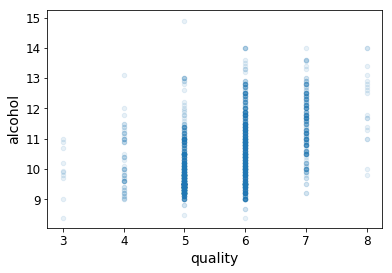

In [31]:
wine.plot(kind="scatter", x="quality", y="alcohol", alpha=0.1)

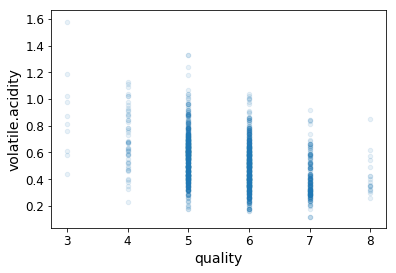

In [32]:
wine.plot(kind="scatter", x="quality", y="volatile.acidity", alpha=0.1)

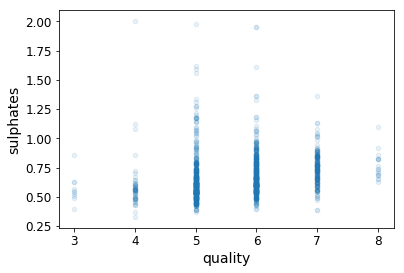

In [35]:
wine.plot(kind="scatter", x="quality", y="sulphates", alpha=0.1)

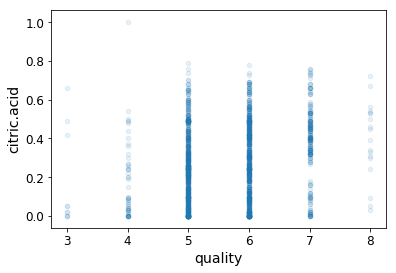

In [36]:
wine.plot(kind="scatter", x="quality", y="citric.acid", alpha=0.1)

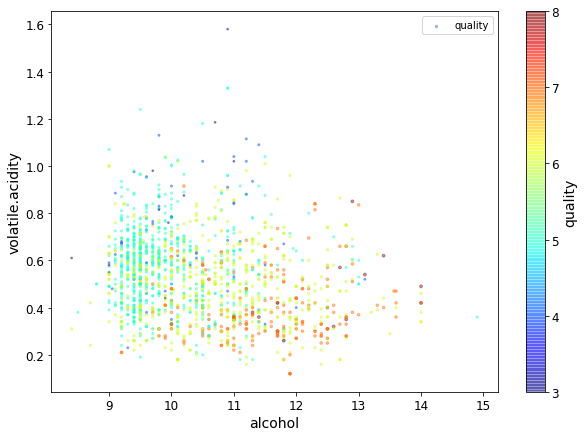

In [33]:
wine.plot(kind="scatter", x="alcohol", y="volatile.acidity", alpha=0.4,
            s=wine["quality"], label="quality",figsize=(10,7),
            c="quality", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()

## Causal Inference

## Model 1: Treatment = Alcohol
**Creating a Causal Model**  

In [37]:
# Setting up the data
df = wine
treatment_name = ["alcohol"]
outcome_name = ["quality"]
common_causes_names = ["volatile.acidity", "sulphates", "citric.acid", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [38]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['alcohol'] on outcome ['quality']


**Viewing the Model**

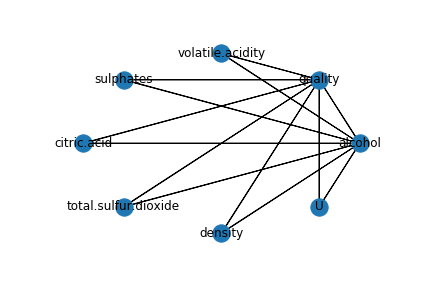

In [41]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [42]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['total.sulfur.dioxide', 'density', 'sulphates', 'U', 'volatile.acidity', 'citric.acid']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(quality|total.sulfur.dioxide,density,sulphates,volatile
d[alcohol]                                                                    

                      
.acidity,citric.acid))
                      
Estimand assumption 1, Unconfoundedness: If U→{alcohol} and U→quality then P(quality|alcohol,total.sulfur.dioxide,density,sulphates,volatile.acidity,citric.acid,U) = P(quality|alcohol,total.sulfur.dioxide,density,sulphates,volatile.acidity,citric.acid)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [43]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~alcohol+total.sulfur.dioxide+density+sulphates+volatile.acidity+citric.acid


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(quality|total.sulfur.dioxide,density,sulphates,volatile
d[alcohol]                                                                    

                      
.acidity,citric.acid))
                      
Estimand assumption 1, Unconfoundedness: If U→{alcohol} and U→quality then P(quality|alcohol,total.sulfur.dioxide,density,sulphates,volatile.acidity,citric.acid,U) = P(quality|alcohol,total.sulfur.dioxide,density,sulphates,volatile.acidity,citric.acid)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~alcohol+total.sulfur.dioxide+density+sulphates+volatile.acidity+citric.acid
## Estimate
Value: 0.3045865769765377

## Statistical Significance
p-value: <0.001

Causal Estimate is 0.3045865769765377


Alcohol has a significant positive causal effect on the quality of red wine since the p-value is less than 0.001. 

## Model 2: Treatment = Volatile Acidity   
**Creating a Causal Model**  

In [44]:
# Setting up the data
df = wine
treatment_name = ["volatile.acidity"]
outcome_name = ["quality"]
common_causes_names = ["alcohol", "sulphates", "citric.acid", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [45]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['volatile.acidity'] on outcome ['quality']


**Viewing the Model**

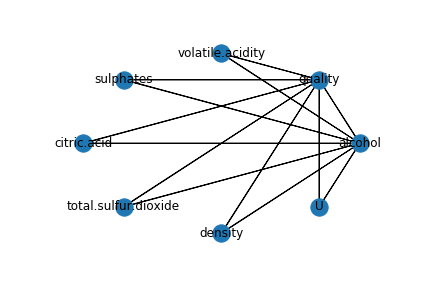

In [46]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [47]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['total.sulfur.dioxide', 'alcohol', 'density', 'sulphates', 'U', 'citric.acid']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(quality|total.sulfur.dioxide,alcohol,density,s
d[volatile.acidity]                                                           

                      
ulphates,citric.acid))
                      
Estimand assumption 1, Unconfoundedness: If U→{volatile.acidity} and U→quality then P(quality|volatile.acidity,total.sulfur.dioxide,alcohol,density,sulphates,citric.acid,U) = P(quality|volatile.acidity,total.sulfur.dioxide,alcohol,density,sulphates,citric.acid)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [48]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~volatile.acidity+total.sulfur.dioxide+alcohol+density+sulphates+citric.acid


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(quality|total.sulfur.dioxide,alcohol,density,s
d[volatile.acidity]                                                           

                      
ulphates,citric.acid))
                      
Estimand assumption 1, Unconfoundedness: If U→{volatile.acidity} and U→quality then P(quality|volatile.acidity,total.sulfur.dioxide,alcohol,density,sulphates,citric.acid,U) = P(quality|volatile.acidity,total.sulfur.dioxide,alcohol,density,sulphates,citric.acid)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~volatile.acidity+total.sulfur.dioxide+alcohol+density+sulphates+citric.acid
## Estimate
Value: -1.2468514595017002

## Statistical Significance
p-value: <0.001

Causal Estimate is -1.2468514595017002


Volatile acidity has a significant negative causal effect on the quality of red wine since the p-value is less than 0.001. 

## Model 3: Treatment = Sulphates  
**Creating a Causal Model**  

In [64]:
# Setting up the data
df = wine
treatment_name = ["sulphates"]
outcome_name = ["quality"]
common_causes_names = ["alcohol","volatile.acidity", "citric.acid", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [65]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['sulphates'] on outcome ['quality']


**Viewing the Model**

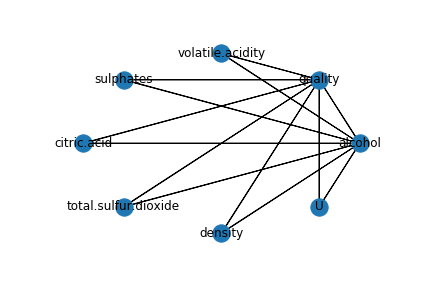

In [66]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [67]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['total.sulfur.dioxide', 'alcohol', 'density', 'U', 'volatile.acidity', 'citric.acid']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(quality|total.sulfur.dioxide,alcohol,density,volatile
d[sulphates]                                                                  

                      
.acidity,citric.acid))
                      
Estimand assumption 1, Unconfoundedness: If U→{sulphates} and U→quality then P(quality|sulphates,total.sulfur.dioxide,alcohol,density,volatile.acidity,citric.acid,U) = P(quality|sulphates,total.sulfur.dioxide,alcohol,density,volatile.acidity,citric.acid)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [68]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~sulphates+total.sulfur.dioxide+alcohol+density+volatile.acidity+citric.acid


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(quality|total.sulfur.dioxide,alcohol,density,volatile
d[sulphates]                                                                  

                      
.acidity,citric.acid))
                      
Estimand assumption 1, Unconfoundedness: If U→{sulphates} and U→quality then P(quality|sulphates,total.sulfur.dioxide,alcohol,density,volatile.acidity,citric.acid,U) = P(quality|sulphates,total.sulfur.dioxide,alcohol,density,volatile.acidity,citric.acid)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~sulphates+total.sulfur.dioxide+alcohol+density+volatile.acidity+citric.acid
## Estimate
Value: 0.7099695054353834

## Statistical Significance
p-value: <0.001

Causal Estimate is 0.7099695054353834


Sulphates has a significant positive causal effect on the quality of red wine since the p-value is less than 0.001. 

## Model 4: Treatment = Citric Acid
**Creating a Causal Model**  

In [70]:
# Setting up the data
df = wine
treatment_name = ["citric.acid"]
outcome_name = ["quality"]
common_causes_names = ["alcohol","volatile.acidity", "sulphates", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [71]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['citric.acid'] on outcome ['quality']


**Viewing the Model**

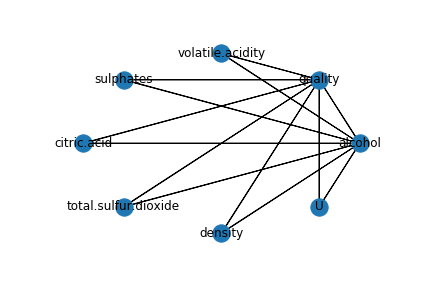

In [72]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [73]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['total.sulfur.dioxide', 'alcohol', 'U', 'sulphates', 'volatile.acidity', 'density']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(quality|total.sulfur.dioxide,alcohol,sulphates,vola
d[citric.acid]                                                                

                      
tile.acidity,density))
                      
Estimand assumption 1, Unconfoundedness: If U→{citric.acid} and U→quality then P(quality|citric.acid,total.sulfur.dioxide,alcohol,sulphates,volatile.acidity,density,U) = P(quality|citric.acid,total.sulfur.dioxide,alcohol,sulphates,volatile.acidity,density)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [74]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~citric.acid+total.sulfur.dioxide+alcohol+sulphates+volatile.acidity+density


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(quality|total.sulfur.dioxide,alcohol,sulphates,vola
d[citric.acid]                                                                

                      
tile.acidity,density))
                      
Estimand assumption 1, Unconfoundedness: If U→{citric.acid} and U→quality then P(quality|citric.acid,total.sulfur.dioxide,alcohol,sulphates,volatile.acidity,density,U) = P(quality|citric.acid,total.sulfur.dioxide,alcohol,sulphates,volatile.acidity,density)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~citric.acid+total.sulfur.dioxide+alcohol+sulphates+volatile.acidity+density
## Estimate
Value: -0.09278912164448982

## Statistical Significance
p-value: 0.273

Causal Estimate is -0.09278912164448982


Citric acid does not have a significant negative causal effect on the quality of red wine since the p-value is greater than 0.001. 

From the causal inference models, it is clear that only alcohol, volatile acidity and sulphates have a causal relationship with the quality of red wine. 

## Feature Selection

In [76]:
X = wine.iloc[:,0:11]
y = wine["quality"]

from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0, n_estimators=1)

model = randomforest.fit(X,y)

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold = 0.05)
sfm.fit(X,y)
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])
    
pd.DataFrame(list(zip(X.columns,model.feature_importances_)), columns = ['predictor','Gini coefficient'])

fixed.acidity
volatile.acidity
citric.acid
residual.sugar
chlorides
free.sulfur.dioxide
total.sulfur.dioxide
density
pH
sulphates
alcohol


/Users/tharadawoodjee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,predictor,Gini coefficient
0,fixed.acidity,0.075114
1,volatile.acidity,0.102130
2,citric.acid,0.071693
3,residual.sugar,0.067394
4,chlorides,0.086718
5,free.sulfur.dioxide,0.066930
6,total.sulfur.dioxide,0.105306
7,density,0.091937
8,pH,0.079173
9,sulphates,0.117327


All features look relatively important in predicting red wine quality and will be kept for the regression task. 

## H2O AutoML to Select Best Model

In [82]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard
#h2o.init()

In [114]:
#Initializing the h2o session 
h2o.init(ip="localhost", port=8889)
#"192.168.0.139"
#"127.0.0.1"
#Tharas-MacBook-Pro-5.local

Checking whether there is an H2O instance running at http://localhost:8889 ..... not found.
Attempting to start a local H2O server...


CalledProcessError: Command '['/usr/bin/java', '-version']' returned non-zero exit status 1.

In [86]:
# Creating train and test sets
train = wine.iloc[0:1120,0:12]
test = wine.iloc[1120:1600, 0:12]

print(train.shape)
print(test.shape)

(1120, 12)
(479, 12)


In [88]:
# Identifying predictors and response variable
x = train.iloc[:,0:11]
y = train["quality"]

In [91]:
# Running AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1) #sort_metric=MSE
aml.train(x=x, y=y, training_frame=train)

H2OConnectionError: Not connected to a cluster. Did you run `h2o.connect()`?

In [ ]:
# AutoML Leaderboard
lb = aml.leaderboard

In [ ]:
# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

In [ ]:
# Printing all rows (instead of default 10 rows)
print(lb.head(rows=lb.nrows))

In [ ]:
# The leader model is stored here
aml.leader

In [ ]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly
preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

## Stacking

## Github